In [8]:
%matplotlib inline

from __future__ import print_function

import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,floatX=float32,device=gpu,lib.cnmem=.95,scan.allow_gc=False"
import theano

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, minmax_scale, maxabs_scale
from sklearn.metrics import mean_squared_error
from sklearn.cluster import MiniBatchKMeans
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.optimizers import Nadam

import pep2space

MAX_POS=12

### Coordinates
**straight** - predict each coordinate.

- naive approach: surround sequences by null symbols.

- "omega loops": first and last amino acids depends on each other other. It is better than the naive approach:
<img src="loss/loss_x_dense_4_4_comparison_clust_and_onehot_1200it.png" width="80%">

- positional: add position for each amino acid to each dense layer. It does a little change:
<img src="loss/loss_x_densepos_4_4_comparison_clust_and_onehot_1200it.png" width="80%">

**difference** - ??? (predict differences between neighbour coordinates)


### Amino acid transformations
**one-hot** - code each amino acid as a 20-dimensional vector with 1 at the index of the corresponding amino acid.

**kidera** - worked worse than one-hot.

**embeddings** - ??? (infer embeddings on the overall dataю)


### Feature generation
**window** - sliding window, predict the coordinate in the centre of the window.

**directional / bidirectional** - ??? (RNN)


## Feature preprocessing

### Scale the data

Scale the data to [0,1]. Tested on models with [128,64] dense layers, 4-4 window size, 2000 iterations.
- per column - scale each column independently:
```
MSE:
no scale:
    cdr - 1.61775   ***
    can - 0.0993797
MinMax:
    cdr - 2.43089   *
    can - 0.0978544
MaxAbs:
    cdr - 1.95208   **
    can - 0.0967865
```
- overall - scale the overall matrix:
```
no scale:
    cdr - 1.61775   ***
    can - 0.0993797
MinMax:
    cdr - 2.27693   *
    can - 0.105339
MaxAbs:
    cdr - 1.96837   **
    can - 0.0973526
```

### Pre-clustering

Assign weights accroding to the clusters' sizes. Cluster weight = `ln(cluster size) / ln(minimal cluster size)`. Clustering helps:

<img src="loss/loss_x_dense_onehot_noscale_clust5.png" width="80%">


## Learning

### Straightforward learning

<img src="loss/loss_x_densepos_4_4_comparison_clust_and_onehot_1200it.png" width="80%">


### Change learning rate

Factor 0.3, patience 3
<img src="loss/loss_x_densepos_4_4_comparison_clust_and_onehot_changelr_factor03_patience3_1200it.png" width="80%">

Factor 0.1, patience 3
<img src="loss/loss_x_densepos_4_4_comparison_clust_and_onehot_changelr_factor01_patience3_1200it.png" width="80%">

Factor 0.1, patience 6
<img src="loss/loss_x_densepos_4_4_comparison_clust_and_onehot_changelr_factor01_patience6_1200it.png" width="80%">


### Add putative sequences to batches

??? (to add noise)


## Post-analysis

### Ensembling

???

# 1-dimensional models

## Check if scaling works better than no-transformation

### Per-column scaling

In [2]:
# hist_list = {}
# model_list = {}

In [3]:
# m_0 = pepm.train_model(MAX_POS, 5, "x", [128,64], 4, 4, 200, hist_list, model_list)
# m_1 = pepm.train_model(MAX_POS, 5, "x", [128,64,64], 6, 6, 200, hist_list, model_list, "col", "abs")
# m_2 = pepm.train_model(MAX_POS, 5, "x", [128,64], 4, 4, 500, hist_list, model_list, "col", "abs")

In [4]:
# df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
# df_can = pd.read_csv("data/can_coord_x.csv.gz")
# X_cdr, y_cdr = to_vec_onehot(df_cdr, 4, 4)
# X_can, y_can = to_vec_onehot(df_can, 4, 4)
# print("cdr", mean_squared_error(y_cdr, m_0.predict(X_cdr)))
# print("can", mean_squared_error(y_can, m_0.predict(X_can)))

# # print("cdr", tr_pred_col("data/cdr_coord_x.csv.gz", MinMaxScaler, m_mm_col, 4, 4))
# # print("can", tr_pred_col("data/can_coord_x.csv.gz", MinMaxScaler, m_mm_col, 4, 4))

# print("cdr", tr_pred_col("data/cdr_coord_x.csv.gz", MaxAbsScaler, best_models_list["left4_right4.128-64-64.col_abs.clust_5"], 4, 4))
# print("can", tr_pred_col("data/can_coord_x.csv.gz", MaxAbsScaler, best_models_list["left4_right4.128-64-64.col_abs.clust_5"], 4, 4))


# # batch=64
# # cdr 1.47792
# # can 0.113192

### Overall scaling

In [5]:
# hist_scale = {}
# m_no = train_models("x", [128,64], 4, 4, 2000, hist_scale)
# m_mm_all = train_models_scale_all("x", [128,64], 4, 4, 2000, hist_scale, "mm")
# m_abs_all = train_models_scale_all("x", [128,64], 4, 4, 2000, hist_scale, "abs")

In [6]:
# df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
# df_can = pd.read_csv("data/can_coord_x.csv.gz")
# X_cdr, y_cdr = to_vec_onehot(df_cdr, 4, 4)
# X_can, y_can = to_vec_onehot(df_can, 4, 4)
# print("cdr", mean_squared_error(y_cdr, m_no.predict(X_cdr)))
# print("can", mean_squared_error(y_can, m_no.predict(X_can)))

# print("cdr", tr_pred("data/cdr_coord_x.csv.gz", MinMaxScaler(), m_mm_all))
# print("can", tr_pred("data/can_coord_x.csv.gz", MinMaxScaler(), m_mm_all))

# print("cdr", tr_pred("data/cdr_coord_x.csv.gz", MaxAbsScaler(), m_abs_all))
# print("can", tr_pred("data/can_coord_x.csv.gz", MaxAbsScaler(), m_abs_all))


# # cdr 1.61775
# # can 0.0993797
# # cdr 2.27693
# # can 0.105339
# # cdr 1.96837
# # can 0.0973526

## Find which windows and layer sizes are the best

In [ ]:
import importlib
from pep2space import model as pepmodel
importlib.reload(pep2space.preprocess)
pepmodel = importlib.reload(pep2space.model)

best_models = [(4,4)]
# best_layers = [[128, 64]]
best_layers = [[32, 32, 32]]

best_hist = {}
best_models_list = {}

for l,r in best_models:
    for layers in best_layers:
#         pep.model.train_model(MAX_POS, 0, "x", layers, l, r, 1600, best_hist, best_models_list, model_type="dense")
#         pep.model.train_model(MAX_POS, 0, "x", layers, l, r, 1600, best_hist, best_models_list, features = "omega", model_type="dense")
#         pep.model.train_model(MAX_POS, 0, "x", layers, l, r, 1600, best_hist, best_models_list, model_type="dense_pos")
#         pep.model.train_model(MAX_POS, 0, "x", layers, l, r, 1600, best_hist, best_models_list, features = "omega", model_type="dense_pos")
#         pepmodel.train_model(MAX_POS, 0, "x", layers, l, r, 1600, best_hist, best_models_list, model_type="dense_poslen")
        pepmodel.train_model(MAX_POS, 0, "x", layers, l, r, 1200, best_hist, best_models_list, model_type="gru")
        pepmodel.train_model(MAX_POS, 0, "x", layers, l, r, 1200, best_hist, best_models_list, model_type="lstm")
        pepmodel.train_model(MAX_POS, 0, "x", layers, l, r, 1200, best_hist, best_models_list, features = "omega", model_type="gru")
        pepmodel.train_model(MAX_POS, 0, "x", layers, l, r, 1200, best_hist, best_models_list, features = "omega", model_type="lstm")
        
print(best_hist.keys())

gru.l4_r4.32-32-32.no_no.onehot	

In [12]:
# from IPython.display import SVG
# import keras
# import keras.utils
# from keras.utils.vis_utils import model_to_dot

# model = best_models_list["dense_poslen.l4_r4.128-64.no_no.onehot"]
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Visualize loss

In [ ]:
fig, ax = plt.subplots(nrows=1, sharex=True, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(8)

def smooth(vec):
    res = []
    window = 1
    step = 1
    for i in range(window, len(vec)-window, step):
        res.append(np.mean(vec[i-window:i+window+1]))
    return res


cur_hist = best_hist
best_models = sorted([(h, np.mean(cur_hist[h].history["val_loss"][-5:])) for h in cur_hist], key=lambda x: x[1])[:10]

# for i, h in enumerate(sorted(cur_hist.keys())):
for i, (h, _) in enumerate(best_models):
    ax[0].plot(np.log2(smooth(cur_hist[h].history["loss"][100:])), label=h)
    ax[1].plot(np.log2(smooth(cur_hist[h].history["val_loss"][100:])), label=h)


ax[0].set_title("loss")
ax[1].set_title("val")
ax[0].legend()
ax[1].legend()

plt.savefig("loss/__loss_x_rnn_4_4_comparison_noclust_1200it.png")

## Visualize predictions

In [11]:
model = best_models_list["dense_poslen.l4_r4.128-64.no_no.omega"]

ValueError: The model expects 3 input arrays, but only received one array. Found: array with shape (828, 180)

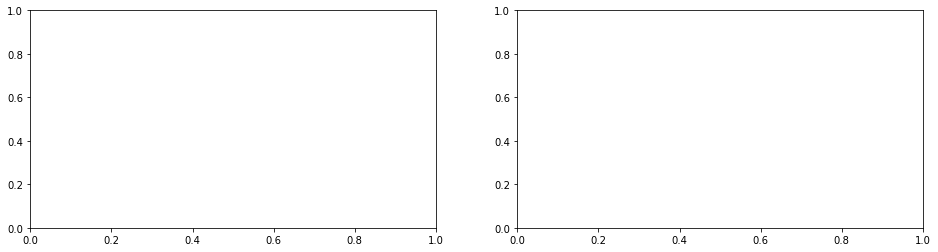

In [13]:
def plot_pred(df, pred, ax, title):
    trans = pred.reshape((len(df),MAX_POS))
    for i in range(len(df)):
        ax.plot(range(MAX_POS), df.iloc[i,4:16], c="black", alpha=.5, label="real")
        ax.plot(range(MAX_POS), trans[i,:], c = "red", linestyle="dotted", alpha=.8, label="pred")
    ax.set_title(title)

    
# Predicted and real coordinates
df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
df_can = pd.read_csv("data/can_coord_x.csv.gz")
X_cdr, y_cdr = pep.preprocess.onehot_omega(df_cdr, 4, 4, MAX_POS)
X_can, y_can = pep.preprocess.onehot_omega(df_can, 4, 4, MAX_POS)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16)

pred = model.predict(X_cdr)
# _, pred = get_true_pred_col("data/cdr_coord_x.csv.gz", MinMaxScaler, m_mm_col)
# _, pred = get_true_pred_col("data/cdr_coord_x.csv.gz", MaxAbsScaler, m_abs_col)
# _, pred = get_true_pred_all("data/cdr_coord_x.csv.gz", MinMaxScaler(), m_mm_all)
# _, pred = get_true_pred_all("data/cdr_coord_x.csv.gz", MaxAbsScaler(), m_abs_all)
plot_pred(df_cdr, pred, ax[0], "CDR")

pred = model.predict(X_can)
# _, pred = get_true_pred_col("data/can_coord_x.csv.gz", MinMaxScaler, m_mm_col)
# _, pred = get_true_pred_col("data/can_coord_x.csv.gz", MaxAbsScaler, m_abs_col)
# _, pred = get_true_pred_all("data/can_coord_x.csv.gz", MinMaxScaler(), m_mm_all)
# _, pred = get_true_pred_all("data/can_coord_x.csv.gz", MaxAbsScaler(), m_abs_all)
plot_pred(df_can, pred, ax[1], "Canonical")

# plt.savefig("pred_dense_onehot_no.png")
# plt.savefig("pred_dense_onehot_mm_col.png")
# plt.savefig("pred_dense_onehot_mm_all.png")
# plt.savefig("pred_dense_onehot_abs_col.png")
plt.savefig("pred_tmp.png")

# 2-dimensional models

In [ ]:
def to_vec_onehot(df, df_add, left_window, right_window):
    X = np.zeros((len(df)*MAX_POS, (left_window+right_window+1) * len(chars)), dtype=bool)
    y = np.zeros((len(df)*MAX_POS, 2), dtype=np.float32)
    for seq_i, seq in enumerate(df["sequence"]):
        seq = "X"*left_window + seq + "X"*right_window
        for index, target_pos in enumerate(range(left_window + 1, len(seq) - right_window)):
            target_aa = seq[target_pos]
            for amb_pos, amb_aa in enumerate(seq[target_pos-left_window : target_pos+right_window+1]):
                if amb_aa != "X":
                    X[seq_i*MAX_POS + index, amb_pos*len(chars):(amb_pos+1)*len(chars)] = one_hot[amb_aa]
            y[seq_i*MAX_POS + index, 0] = df[[4 + index]].iloc[seq_i]
            y[seq_i*MAX_POS + index, 1] = df_add[[4 + index]].iloc[seq_i]
    return X, y


def train_models(coord, layers, left_window, right_window, n_epochs, hist):
    model_name = "left" + str(left_window) + "_right" + str(right_window)
    if model_name not in hist:
        df_cdr = pd.read_csv("data/cdr_coord_" + coord[0] + ".csv.gz")
        df_can = pd.read_csv("data/can_coord_" + coord[0] + ".csv.gz")
        
        df_cdr_add = pd.read_csv("data/cdr_coord_" + coord[1] + ".csv.gz")
        df_can_add = pd.read_csv("data/can_coord_" + coord[1] + ".csv.gz")

        X_can, y_can = to_vec_onehot(df_can, df_can_add, left_window, right_window)
        X_cdr, y_cdr = to_vec_onehot(df_cdr, df_cdr_add, left_window, right_window)

        model = dense_model((20*(right_window+left_window+1),), 2, layers)

        hist[model_name] = model.fit(X_can, y_can, batch_size=128, epochs=n_epochs, verbose=0, validation_data=(X_cdr, y_cdr))


# hist = {}
# for left_window in range(8):
#     for right_window in range(8):
#         train_models("x", left_window, right_window, 2000, hist)

In [ ]:
best_models = [(3,3), (4,4), (5,5), (6,6)]

best_hist = {}
for l,r in best_models:
    train_models(["x", "y"], [128,64], l, r, 2000, best_hist)

In [ ]:
fig, ax = plt.subplots(nrows=1, sharex=True, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(10)

def smooth(vec):
    res = []
    window = 10
    step = 1
    for i in range(window, len(vec)-window, step):
        res.append(np.mean(vec[i-window:i+window+1]))
    return res

cur_hist = best_hist
best_models = sorted([(h, np.mean(cur_hist[h].history["val_loss"][-5:])) for h in cur_hist], key=lambda x: x[1])[:8]

for i, (h, _) in enumerate(sorted(best_models)):
    ax[0].plot(np.log2(smooth(cur_hist[h].history["loss"][100:])), label=h)
    ax[1].plot(np.log2(smooth(cur_hist[h].history["val_loss"][100:])), label=h)


ax[0].set_title("loss")
ax[1].set_title("val")
ax[0].legend()
ax[1].legend()

plt.savefig("loss/loss_xy_dense2layer_onehot_2000it.png")

In [ ]:
def to_vec_onehot(df, df_add, left_window, right_window):
    X = np.zeros((len(df)*MAX_POS, (left_window+right_window+1) * len(chars)), dtype=bool)
    y = np.zeros((len(df)*MAX_POS, 2), dtype=np.float32)
    for seq_i, seq in enumerate(df["sequence"]):
        seq = "X"*left_window + seq + "X"*right_window
        for index, target_pos in enumerate(range(left_window + 1, len(seq) - right_window)):
            target_aa = seq[target_pos]
            for amb_pos, amb_aa in enumerate(seq[target_pos-left_window : target_pos+right_window+1]):
                if amb_aa != "X":
                    X[seq_i*MAX_POS + index, amb_pos*len(chars):(amb_pos+1)*len(chars)] = one_hot[amb_aa]
            y[seq_i*MAX_POS + index, 0] = df[[4 + index]].iloc[seq_i]
            y[seq_i*MAX_POS + index, 1] = df_add[[4 + index]].iloc[seq_i]
    return X, y


df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
df_can = pd.read_csv("data/can_coord_x.csv.gz")

df_cdr_add = pd.read_csv("data/cdr_coord_y.csv.gz")
df_can_add = pd.read_csv("data/can_coord_y.csv.gz")

X_can, y_can = to_vec_onehot(df_can, df_can_add, 5, 5)
X_cdr, y_cdr = to_vec_onehot(df_cdr, df_cdr_add, 5, 5)

model = dense_model((20*(5+5+1),), 2, [128, 64])

model.fit(X_can, y_can, batch_size=128, epochs=2000, verbose=0, validation_data=(X_cdr, y_cdr))

In [ ]:
# Predicted and real coordinates
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(10)


pred = model.predict(X_cdr)
pred_x, pred_y = pred[:,0], pred[:,1]

df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
trans = pred_x.reshape((len(df_cdr),12))
for i in range(len(df_cdr)):
    ax[0][0].plot(range(12), df_cdr.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[0][0].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[0][0].set_title("CDR X")

df_cdr = pd.read_csv("data/cdr_coord_y.csv.gz")
trans = pred_y.reshape((len(df_cdr),12))
for i in range(len(df_cdr)):
    ax[1][0].plot(range(12), df_cdr.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[1][0].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[1][0].set_title("CDR Y")

    
pred = model.predict(X_can)
pred_x, pred_y = pred[:,0], pred[:,1]

df_can = pd.read_csv("data/can_coord_x.csv.gz")
trans = pred_x.reshape((len(df_can),12))
for i in range(len(df_can)):
    ax[0][1].plot(range(12), df_can.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[0][1].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[0][1].set_title("Canonical X")

df_can = pd.read_csv("data/can_coord_y.csv.gz")
trans = pred_y.reshape((len(df_can),12))
for i in range(len(df_can)):
    ax[1][1].plot(range(12), df_can.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[1][1].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[1][1].set_title("Canonical Y")

plt.savefig("pred/pred_xy_dense2layer_onehot_2000it.png")

In [ ]:
pred = model.predict(X_cdr)
pred_x, pred_y = pred[:,0], pred[:,1]
pred_x[11]